In [295]:
%config InlineBackend.figure_format = 'retina'

In [296]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

In [297]:
barrels = [
    174,
    190,
    243,
    275,
    320,
    369,
    347,
    455,
    488,
    502,
    574,
    604,
    609,
    681,
    728,
    770,
    822,
    919,
    920,
    1037,
    1210,
    1294,
    1527,
    2007,
    1951,
    1700,
    2112,
    2469,
    2463,
    2760,
    2460,
    2332,
    2145,
    2481,
    2488,
    2723,
    3001,
    3500,
    3324,
    3464,
    4107,
    3847,
    3796,
    4125,
    4584,
    4695,
    4749,
    5088,
    5520,
    5046,
    5407,
    6158,
    6256,
    6458,
    6342,
    6807,
    7151,
    7170,
    6710,
    7054,
    7035,
    7183,
    7332,
    7542,
    7614,
    7804,
    8295,
    8810,
    9096,
    9238,
    9637,
    9463,
    9441,
    9208,
    8774,
    8375,
    8132,
    8245,
    8707,
    8552,
    8597,
    8572,
    8649,
    8688,
    8879,
    8971,
    8680,
    8349,
    8140,
    7613,
    7355,
    7417,
    7171,
    6847,
    6662,
    6560,
    6465,
    6452,
    6252,
    5881,
    5822,
    5801,
    5744,
    5649,
    5441,
    5184,
    5086,
    5074,
    5000,
    5357,
    5484,
    5674,
    6524,
    7495,
    8791,
    9439,
    8846,
    9357,
    10951,
    12311,
    11318,
    11268,
    11911,
]

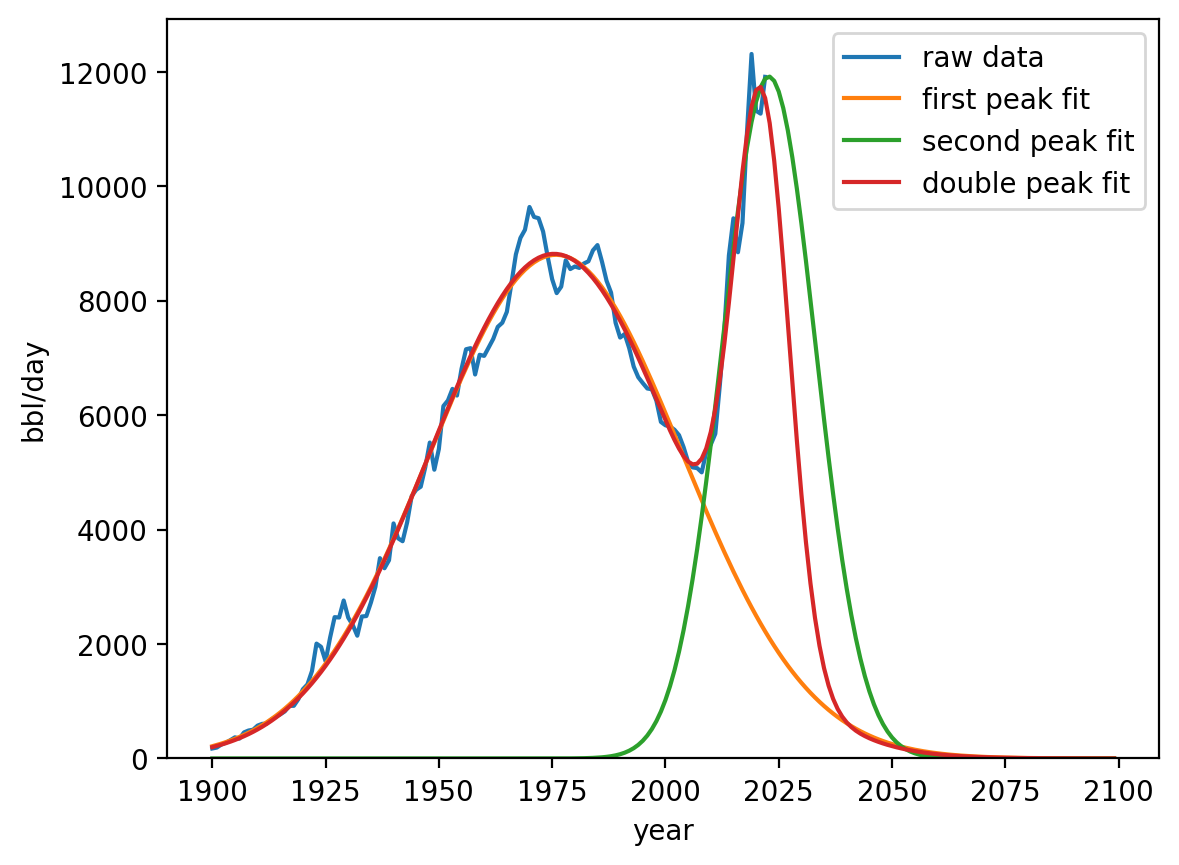

In [298]:
years = range(1900, 2022 + 1)
years_extrapolated = range(1900, 2100)
first_set_of_years = range(1900, 2009)
first_set_of_barrels = barrels[:109]

second_set_of_years = range(2009, 2023)
second_set_of_barrels = barrels[109:]


index_of_2008 = years.index(2008)


# Define the Gaussian function
def gauss(x, a, x0, sigma):
    return a * np.exp(-((x - x0) ** 2) / (2 * sigma**2))


def gauss2(x, a1, x01, sigma1, a2, x02, sigma2):
    return a1 * np.exp(-((x - x01) ** 2) / (2 * sigma1**2)) + a2 * np.exp(
        -((x - x02) ** 2) / (2 * sigma2**2)
    )


plt.plot(years, barrels)
plt.xlabel("year")
plt.ylabel("bbl/day")

# curve fitting
popt1, pcov2 = opt.curve_fit(
    gauss, first_set_of_years, first_set_of_barrels, [8000, 1900, 1]
)

popt2, pcov2 = opt.curve_fit(
    gauss, second_set_of_years, second_set_of_barrels, [10_000, 2020, 1]
)
popt_double, pcov3 = opt.curve_fit(
    gauss2, years, barrels, [8000, 1976, 1, 10_000, 2020, 1]
)

fit_1 = gauss(years_extrapolated, *popt1)
fit_2 = gauss(years_extrapolated, *popt2)
fit_3 = gauss2(years_extrapolated, *popt_double)


plt.ylim(bottom=0)
plt.plot(years_extrapolated, fit_1)
plt.plot(years_extrapolated, fit_2)
plt.plot(years_extrapolated, fit_3)
plt.legend(["raw data", "first peak fit", "second peak fit", "double peak fit"])